In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils import data
from torch import nn 
import copy
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, roc_curve, confusion_matrix, precision_score, recall_score, auc
from sklearn.model_selection import KFold
torch.manual_seed(1)    # reproducible torch:2 np:3
np.random.seed(1)

from config import BIN_config_DBPE
from models import BIN_Interaction_Flat
from stream import BIN_Data_Encoder
import torch

/Users/adele/Library/Python/3.7/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Initialize your configuration
config = BIN_config_DBPE()  # This should create a configuration dictionary for the model

# Create an instance of the model
model = BIN_Interaction_Flat(**config)

# Load the state dictionary from the saved model, ensuring it's mapped to CPU
model.load_state_dict(torch.load("DAVIS_1_17.pth", map_location=torch.device('cpu')))  # Use the appropriate file path

# Set the model to evaluation mode
model.eval()


BIN_Interaction_Flat(
  (demb): Embeddings(
    (word_embeddings): Embedding(23532, 384)
    (position_embeddings): Embedding(50, 384)
    (LayerNorm): LayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (pemb): Embeddings(
    (word_embeddings): Embedding(16693, 384)
    (position_embeddings): Embedding(545, 384)
    (LayerNorm): LayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (d_encoder): Encoder_MultipleLayers(
    (layer): ModuleList(
      (0): Encoder(
        (attention): Attention(
          (self): SelfAttention(
            (query): Linear(in_features=384, out_features=384, bias=True)
            (key): Linear(in_features=384, out_features=384, bias=True)
            (value): Linear(in_features=384, out_features=384, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): SelfOutput(
            (dense): Linear(in_features=384, out_features=384, bias=True)
            (LayerNorm): LayerNorm()
            (dropo

HERE THE TEST SET IS WHAT IS UNUSED IN TRAINING NOT VALIDATION
run the execution_DAVIS.py in the cluster. outputs the model as well as predictions on test.csv

Analyzing predictions

ROC AUC Score: 0.909
Precision-Recall AUC Score: 0.380
F1 Score: 0.294
Precision: 0.175
Recall: 0.907

Confusion Matrix:
[[4408 1290]
 [  28  274]]


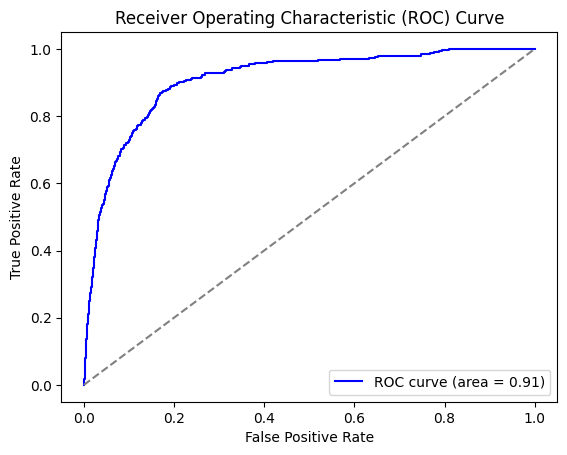

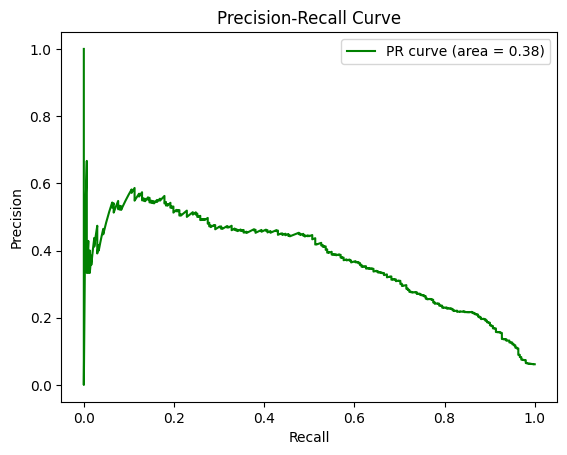

In [ ]:
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, roc_curve, precision_score, recall_score, auc, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt


# Load data
# Load the CSV file
df = pd.read_csv("test_predictions_1_19.csv")
#df = pd.read_csv("test_predictions_pharos (2).csv")
#df = pd.read_csv("test_predictions_pharos_allp (2).csv")

# Extract True Labels and Predicted Scores
labels_df = df["True_Label"].values
predictions_df = df["Predicted_Score"].values


y_true = labels_df  # True labels (0 or 1)
y_pred_prob = predictions_df  # Predicted probabilities (between 0 and 1)

#Davis 0.297257661819458
#Pharos 0.019704099744558334
#PharosAP 0.025588534772396088
threshold = 0.297257661819458
y_pred_binary = (y_pred_prob >= threshold).astype(int)

# Calculate evaluation metrics
roc_auc = roc_auc_score(y_true, y_pred_prob)
pr_auc = average_precision_score(y_true, y_pred_prob)
f1 = f1_score(y_true, y_pred_binary)
precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
conf_matrix = confusion_matrix(y_true, y_pred_binary)

# Print the metrics
print(f"ROC AUC Score: {roc_auc:.3f}")
print(f"Precision-Recall AUC Score: {pr_auc:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred_prob)
plt.figure()
plt.plot(recall_vals, precision_vals, color='green', label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()



True Label counts:
1.0    405
0.0     75
Name: True_Label, dtype: int64


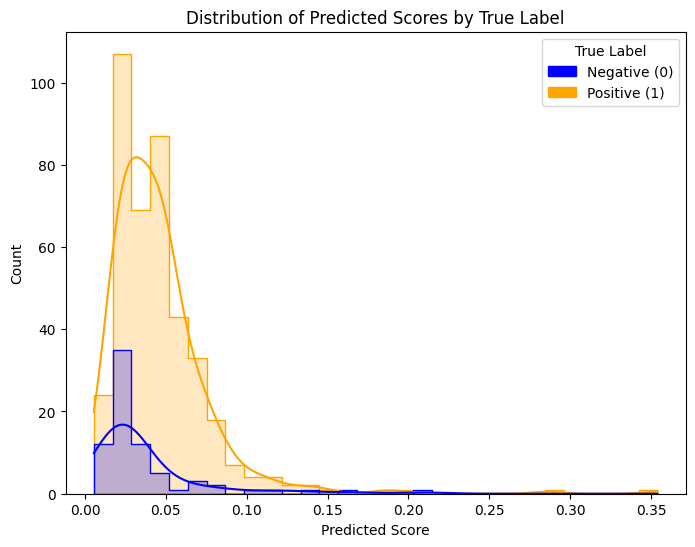

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Load predictions from CSV
predictions_df = pd.read_csv("test_predictions_pharos_allp (2).csv")

# Count occurrences of each label
label_counts = predictions_df["True_Label"].value_counts()
print(f"True Label counts:\n{label_counts}")

# Define color mapping
color_mapping = {0: "blue", 1: "orange"}

# Create the plot
plt.figure(figsize=(8, 6))
sns.histplot(
    data=predictions_df,
    x="Predicted_Score",
    hue="True_Label",
    bins=30,
    kde=True,
    element="step",
    common_norm=False,
    palette=color_mapping  # Set specific colors
)

# Formatting
plt.xlabel("Predicted Score")
plt.ylabel("Count")
plt.title("Distribution of Predicted Scores by True Label")

# Manually create the legend
legend_patches = [
    mpatches.Patch(color="blue", label="Negative (0)"),
    mpatches.Patch(color="orange", label="Positive (1)")
]
plt.legend(handles=legend_patches, title="True Label")

plt.show()


In [94]:
#trying to blind a protein from DAVIS val

# find proteins that exists in test set and not in validation or training set
# combine dataset/DAVIS/train.csv and dataset/DAVIS/val.csv
# compare to dataset/DAVIS/test.csv

import pandas as pd

# Load datasets
train_df = pd.read_csv("dataset/DAVIS/train.csv")
val_df = pd.read_csv("dataset/DAVIS/val.csv")
test_df = pd.read_csv("dataset/DAVIS/test.csv")

# Extract unique protein sequences
train_proteins = set(train_df["Target Sequence"].unique())
val_proteins = set(val_df["Target Sequence"].unique())
test_proteins = set(test_df["Target Sequence"].unique())

# Find proteins that are only in the test set and not in train or val
exclusive_test_proteins = test_proteins - (train_proteins | val_proteins)

print(f"Number of proteins exclusive to test set: {len(exclusive_test_proteins)}")


Number of proteins exclusive to test set: 0


In [98]:
import pandas as pd
import random

# Find proteins common in all three datasets
common_proteins = train_proteins & val_proteins & test_proteins

# Function to check if a protein has both positive and negative interactions
def has_positive_and_negative_interactions(df, protein):
    interactions = df[df["Target Sequence"] == protein]["Label"]  
    return 0 in interactions.values and 1 in interactions.values

# Filter for proteins that exist in all three datasets and have both positive and negative interactions
eligible_proteins = [p for p in common_proteins if has_positive_and_negative_interactions(pd.concat([train_df, val_df, test_df]), p)]

if eligible_proteins:
    # Select a random eligible protein to blind
    protein_to_blind = random.choice(eligible_proteins)
    print(f"Blinding protein: {protein_to_blind}")

    # Get all interactions of this protein from train, val, and test
    blinded_interactions_train = train_df[train_df["Target Sequence"] == protein_to_blind]
    blinded_interactions_val = val_df[val_df["Target Sequence"] == protein_to_blind]
    blinded_interactions_test = test_df[test_df["Target Sequence"] == protein_to_blind]

    # Remove this protein from train, validation, and test sets
    train_df_blinded = train_df[train_df["Target Sequence"] != protein_to_blind]
    val_df_blinded = val_df[val_df["Target Sequence"] != protein_to_blind]
    test_df_non_blinded = test_df[test_df["Target Sequence"] != protein_to_blind]  # Keep non-blinded interactions

    # Create a new test set containing only the blinded protein
    test_df_blinded = pd.concat([blinded_interactions_train, blinded_interactions_val, blinded_interactions_test], ignore_index=True)

    # Decide how to distribute the removed test interactions
    test_non_blinded_list = test_df_non_blinded.to_dict(orient="records")
    random.shuffle(test_non_blinded_list)  # Shuffle for random distribution

    split_idx = len(test_non_blinded_list) // 2  # 50% to train, 50% to val

    # Convert back to DataFrame
    train_df_blinded = pd.concat([train_df_blinded, pd.DataFrame(test_non_blinded_list[:split_idx])], ignore_index=True)
    val_df_blinded = pd.concat([val_df_blinded, pd.DataFrame(test_non_blinded_list[split_idx:])], ignore_index=True)

    # Save the updated datasets
    train_df_blinded.to_csv("dataset/DAVIS_b2/train.csv", index=False)
    val_df_blinded.to_csv("dataset/DAVIS_b2/val.csv", index=False)
    test_df_blinded.to_csv("dataset/DAVIS_b2/test.csv", index=False)

    # Confirm the protein is removed from train and validation sets
    train_check = protein_to_blind in set(train_df_blinded["Target Sequence"])
    val_check = protein_to_blind in set(val_df_blinded["Target Sequence"])
    
    if not train_check and not val_check:
        print(f"Successfully removed {protein_to_blind} from train and validation sets.")
    else:
        print(f"Error: Protein {protein_to_blind} was not fully removed from train/val.")

    # Confirm the test set now contains **only** the blinded protein
    unique_test_proteins = set(test_df_blinded["Target Sequence"])
    if unique_test_proteins == {protein_to_blind}:
        print(f"Test set successfully contains only {protein_to_blind}.")
    else:
        print(f"Error: Test set contains unexpected proteins: {unique_test_proteins}")

else:
    print("No eligible proteins found that exist in train, validation, and test and have both positive and negative interactions.")


Blinding protein: MVMADGPRHLQRGPVRVGFYDIEGTLGKGNFAVVKLGRHRITKTEVAIKIIDKSQLDAVNLEKIYREVQIMKMLDHPHIIKLYQVMETKSMLYLVTEYAKNGEIFDYLANHGRLNESEARRKFWQILSAVDYCHGRKIVHRDLKAENLLLDNNMNIKIADFGFGNFFKSGELLATWCGSPPYAAPEVFEGQQYEGPQLDIWSMGVVLYVLVCGALPFDGPTLPILRQRVLEGRFRIPYFMSEDCEHLIRRMLVLDPSKRLTIAQIKEHKWMLIEVPVQRPVLYPQEQENEPSIGEFNEQVLRLMHSLGIDQQKTIESLQNKSYNHFAAIYFLLVERLKSHRSSFPVEQRLDGRQRRPSTIAEQTVAKAQTVGLPVTMHSPNMRLLRSALLPQASNVEAFSFPASGCQAEAAFMEEECVDTPKVNGCLLDPVPPVLVRKGCQSLPSNMMETSIDEGLETEGEAEEDPAHAFEAFQSTRSGQRRHTLSEVTNQLVVMPGAGKIFSMNDSPSLDSVDSEYDMGSVQRDLNFLEDNPSLKDIMLANQPSPRMTSPFISLRPTNPAMQALSSQKREVHNRSPVSFREGRRASDTSLTQGIVAFRQHLQNLARTKGILELNKVQLLYEQIGPEADPNLAPAAPQLQDLASSCPQEEVSQQQESVSTLPASVHPQLSPRQSLETQYLQHRLQKPSLLSKAQNTCQLYCKEPPRSLEQQLQEHRLQQKRLFLQKQSQLQAYFNQMQIAESSYPQPSQQLPLPRQETPPPSQQAPPFSLTQPLSPVLEPSSEQMQYSPFLSQYQEMQLQPLPSTSGPRAAPPLPTQLQQQQPPPPPPPPPPRQPGAAPAPLQFSYQTCELPSAASPAPDYPTPCQYPVDGAQQSDLTGPDCPRSPGLQEAPSSYDPLALSELPGLFDCEMLDAVDPQHNGYVLVN
Successfully removed MVMADGPRHLQRGPVRVGFYDIEGTLGKGNFAVV

blinding 20%

In [101]:
import pandas as pd
import random

# Load or define your DataFrames: train_df, val_df, test_df
# For example:
# train_df = pd.read_csv("train.csv")
# val_df = pd.read_csv("val.csv")
# test_df = pd.read_csv("test.csv")

# Extract unique proteins from each set
train_proteins = set(train_df["Target Sequence"])
val_proteins = set(val_df["Target Sequence"])
test_proteins = set(test_df["Target Sequence"])

# Find proteins common in train, validation, and test sets
common_proteins = train_proteins & val_proteins & test_proteins

# Function to check if a protein has both positive (1) and negative (0) interactions
def has_positive_and_negative_interactions(df, protein):
    interactions = df[df["Target Sequence"] == protein]["Label"]
    return 0 in interactions.values and 1 in interactions.values

# Identify eligible proteins: appear in all 3 sets + have both 0 and 1 labels
combined_df = pd.concat([train_df, val_df, test_df], ignore_index=True)
eligible_proteins = [
    p for p in common_proteins 
    if has_positive_and_negative_interactions(combined_df, p)
]

if eligible_proteins:
    # Determine how many proteins to blind (20%)
    n_to_blind = max(1, int(0.2 * len(eligible_proteins)))
    proteins_to_blind = random.sample(eligible_proteins, n_to_blind)

    print(f"Blinding {n_to_blind} proteins:\n{proteins_to_blind}")

    # Gather all interactions of these proteins from train, val, and test
    blinded_interactions_train = train_df[train_df["Target Sequence"].isin(proteins_to_blind)]
    blinded_interactions_val = val_df[val_df["Target Sequence"].isin(proteins_to_blind)]
    blinded_interactions_test = test_df[test_df["Target Sequence"].isin(proteins_to_blind)]

    # Remove these proteins from train, validation, and test sets
    train_df_blinded = train_df[~train_df["Target Sequence"].isin(proteins_to_blind)]
    val_df_blinded = val_df[~val_df["Target Sequence"].isin(proteins_to_blind)]
    test_df_non_blinded = test_df[~test_df["Target Sequence"].isin(proteins_to_blind)]

    # Create a new test set containing only the blinded proteins
    test_df_blinded = pd.concat(
        [blinded_interactions_train, blinded_interactions_val, blinded_interactions_test],
        ignore_index=True
    )

    # Distribute the non-blinded test interactions between train and val (50/50)
    test_non_blinded_list = test_df_non_blinded.to_dict(orient="records")
    random.shuffle(test_non_blinded_list)
    split_idx = len(test_non_blinded_list) // 2

    train_df_blinded = pd.concat(
        [train_df_blinded, pd.DataFrame(test_non_blinded_list[:split_idx])],
        ignore_index=True
    )
    val_df_blinded = pd.concat(
        [val_df_blinded, pd.DataFrame(test_non_blinded_list[split_idx:])],
        ignore_index=True
    )

    # Save the updated datasets
    train_df_blinded.to_csv("dataset/DAVIS_b3/train.csv", index=False)
    val_df_blinded.to_csv("dataset/DAVIS_b3/val.csv", index=False)
    test_df_blinded.to_csv("dataset/DAVIS_b3/test.csv", index=False)

    # Validation checks
    # 1. Ensure the blinded proteins are removed from train & val
    train_check = set(train_df_blinded["Target Sequence"]) & set(proteins_to_blind)
    val_check = set(val_df_blinded["Target Sequence"]) & set(proteins_to_blind)

    if not train_check and not val_check:
        print(f"Successfully removed {n_to_blind} proteins from train and validation sets.")
    else:
        print("Error: Some blinded proteins remain in train/val.")

    # 2. Confirm the test set now contains only the blinded proteins
    unique_test_proteins = set(test_df_blinded["Target Sequence"])
    if unique_test_proteins == set(proteins_to_blind):
        print("Test set successfully contains only the blinded proteins.")
    else:
        print(f"Error: Test set contains unexpected proteins:\n{unique_test_proteins - set(proteins_to_blind)}")

else:
    print("No eligible proteins found that exist in all three datasets and have both positive and negative interactions.")


Blinding 62 proteins:
['AASEPDTAGSVRGLPTAHCPVVQDNRTLGDSSAGEIALSTRNVSETRYVSELTLVRVKVAEAGHYTMRAFHEDAEVQLSFQLQINVPVRVLELSESHPDSGEQTVRCRGRGMPQPNIIWSACRDLKRCPRELPPTLLGNSSEEESQLETNVTYWEEEQEFEVVSTLRLQHVDRPLSVRCTLRNAVGQDTQEVIVVPHSLPFKVVVISAILALVVLTIISLIILIMLWQKKPRYEIRWKVIESVSSDGHEYIYVDPMQLPYDSTWELPRDQLVLGRTLGSGAFGQVVEATAHGLSHSQATMKVAVKMLKSTARSSEKQALMSELKIMSHLGPHLNVVNLLGACTKGGPIYIITEYCRYGDLVDYLHRNKHTFLQHHSDKRRPPSAELYSNALPVGLPLPSHVSLTGESDGGYMDMSKDESVDYVPMLDMKGDVKYADIESSNYMAPYDNYVPSAPERTCRATLINESPVLSYMDLVGFSYQVANGMEFLASKNCVHRDLAARNVLICEGKLVKICDFGLARDIMRDSNYISKGSTFLPLKWMAPESIFNSLYTTLSDVWSFGILLWEIFTLGGTPYPELPMNEQFYNAIKRGYRMAQPAHASDEIYEIMQKCWEEKFEIRPPFSQLVLLLERLLGEGYKKKYQQVDEEFLRSDHPAILRSQARLPGFHGLRSPLDTSSVLYTAVQPNEGDNDYIIPLPDPKPEVADEGPLEGSPSLASSTLNEVNTSSTISCDSPLEPQDEPEPEPQLELQVEPEPELEQLPDSGCPAPRAEAEDSFL', 'MGMACLTMTEMEGTSTSSIYQNGDISGNANSMKQIDPVLQVYLYHSLGKSEADYLTFPSGEYVAEEICIAASKACGITPVYHNMFALMSETERIWYPPNHVFHIDESTRHNVLYRIRFYFPRWYCSGSNRAYRHGISRGAEAPLLDDFVMSYLFAQWRHDFVHGWIKVPVTHETQEECLGMAVLDMMRIAKENDQ

In [ ]:

#look into why some get dropped during prediction? - drop last = true


In [69]:
#Stats for DAVIS 
import pandas as pd

# Read the datasets
train_df = pd.read_csv('dataset/DAVIS/train.csv')
val_df = pd.read_csv('dataset/DAVIS/val.csv')
test_df = pd.read_csv('dataset/DAVIS/test.csv')

# Function to compute statistics about the Label column, number of unique drugs, and proteins
def compute_stats(df):
    stats = {}
    # Label distribution (0 or 1)
    stats['label_0_count'] = (df['Label'] == 0).sum()
    stats['label_1_count'] = (df['Label'] == 1).sum()

    # Unique drugs (SMILES) and proteins (uniprot)
    stats['num_unique_drugs'] = df['SMILES'].nunique()
    stats['num_unique_proteins'] = df['Target Sequence'].nunique()

    return stats

# Compute statistics for each dataset
train_stats = compute_stats(train_df)
val_stats = compute_stats(val_df)
test_stats = compute_stats(test_df)

# Print statistics
print("Train Stats:", train_stats)
print("Validation Stats:", val_stats)
print("Test Stats:", test_stats)

# Compute overlap between datasets
def compute_overlap(df1, df2, column):
    return len(set(df1[column]).intersection(set(df2[column])))

# Calculate overlaps in proteins and drugs between datasets
overlap_proteins_train_val = compute_overlap(train_df, val_df, 'Target Sequence')
overlap_proteins_train_test = compute_overlap(train_df, test_df, 'Target Sequence')
overlap_proteins_val_test = compute_overlap(val_df, test_df, 'Target Sequence')

overlap_drugs_train_val = compute_overlap(train_df, val_df, 'SMILES')
overlap_drugs_train_test = compute_overlap(train_df, test_df, 'SMILES')
overlap_drugs_val_test = compute_overlap(val_df, test_df, 'SMILES')

# Print overlaps
print(f"Protein Overlap (Train vs Val): {overlap_proteins_train_val}")
print(f"Protein Overlap (Train vs Test): {overlap_proteins_train_test}")
print(f"Protein Overlap (Val vs Test): {overlap_proteins_val_test}")

print(f"Drug Overlap (Train vs Val): {overlap_drugs_train_val}")
print(f"Drug Overlap (Train vs Test): {overlap_drugs_train_test}")
print(f"Drug Overlap (Val vs Test): {overlap_drugs_val_test}")

# Combine the datasets (train + val + test)
combined_df = pd.concat([train_df, val_df, test_df])

# Recompute the Label distribution for the combined dataset
combined_stats = compute_stats(combined_df)

# Print combined dataset statistics
print("Combined Dataset Stats:", combined_stats)


Train Stats: {'label_0_count': 1043, 'label_1_count': 1043, 'num_unique_drugs': 68, 'num_unique_proteins': 372}
Validation Stats: {'label_0_count': 2846, 'label_1_count': 160, 'num_unique_drugs': 68, 'num_unique_proteins': 378}
Test Stats: {'label_0_count': 5708, 'label_1_count': 303, 'num_unique_drugs': 68, 'num_unique_proteins': 379}
Protein Overlap (Train vs Val): 371
Protein Overlap (Train vs Test): 372
Protein Overlap (Val vs Test): 378
Drug Overlap (Train vs Val): 68
Drug Overlap (Train vs Test): 68
Drug Overlap (Val vs Test): 68
Combined Dataset Stats: {'label_0_count': 9597, 'label_1_count': 1506, 'num_unique_drugs': 68, 'num_unique_proteins': 379}


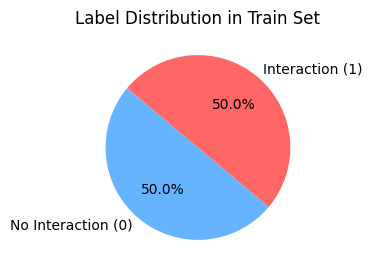

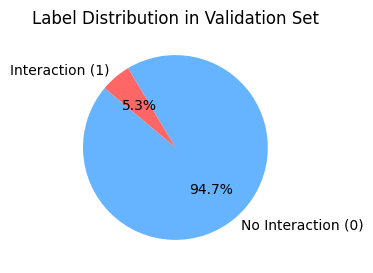

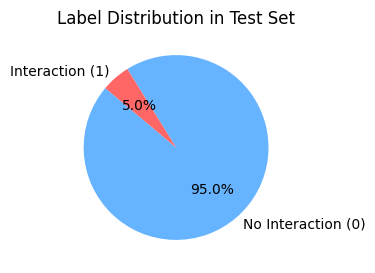

In [71]:
import matplotlib.pyplot as plt

# Function to plot pie chart for a given distribution
def plot_pie_chart(data, labels, title):
    plt.figure(figsize=(3, 3))
    plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff6666'])
    plt.title(title)
    plt.show()

# Pie chart for Label distribution (0 or 1)
label_distribution = [train_stats['label_0_count'], train_stats['label_1_count']]
label_labels = ['No Interaction (0)', 'Interaction (1)']
plot_pie_chart(label_distribution, label_labels, "Label Distribution in Train Set")

# Label distribution for validation and test sets
label_distribution_val = [val_stats['label_0_count'], val_stats['label_1_count']]
plot_pie_chart(label_distribution_val, label_labels, "Label Distribution in Validation Set")

label_distribution_test = [test_stats['label_0_count'], test_stats['label_1_count']]
plot_pie_chart(label_distribution_test, label_labels, "Label Distribution in Test Set")


collect results from the blinded experiment 

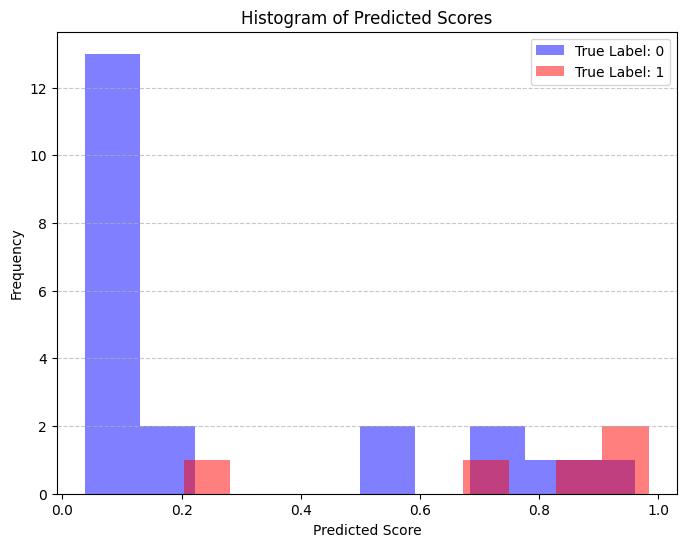

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
#df = pd.read_csv("test_predictions_b_1_19.csv")
df = pd.read_csv("test_predictions_b2.csv")
#df = pd.read_csv("test_predictions_b3.csv")

# Extract true labels and predicted scores
true_labels = df["True_Label"]
predicted_scores = df["Predicted_Score"]

# Create histogram
plt.figure(figsize=(8, 6))
plt.hist(predicted_scores[true_labels == 0], bins=10, alpha=0.5, label="True Label: 0", color="blue")
plt.hist(predicted_scores[true_labels == 1], bins=10, alpha=0.5, label="True Label: 1", color="red")

# Formatting
plt.xlabel("Predicted Score")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Scores")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [108]:
# Read the datasets
train_b = pd.read_csv('dataset/DAVIS_b/train.csv')
val_b = pd.read_csv('dataset/DAVIS_b/val.csv')
test_b = pd.read_csv('dataset/DAVIS_b/test.csv')

train_b2 = pd.read_csv('dataset/DAVIS_b2/train.csv')
val_b2 = pd.read_csv('dataset/DAVIS_b2/val.csv')
test_b2 = pd.read_csv('dataset/DAVIS_b2/test.csv')

train_b3 = pd.read_csv('dataset/DAVIS_b3/train.csv')
val_b3 = pd.read_csv('dataset/DAVIS_b3/val.csv')
test_b3 = pd.read_csv('dataset/DAVIS_b3/test.csv')

# Function to compute statistics about the Label column, number of unique drugs, and proteins
def compute_stats(df):
    stats = {}
    # Label distribution (0 or 1)
    stats['label_0_count'] = (df['Label'] == 0).sum()
    stats['label_1_count'] = (df['Label'] == 1).sum()

    # Unique drugs (SMILES) and proteins (uniprot)
    stats['num_unique_drugs'] = df['SMILES'].nunique()
    stats['num_unique_proteins'] = df['Target Sequence'].nunique()

    return stats

# Compute statistics for each dataset
train_stats_b = compute_stats(train_b)
val_stats_b = compute_stats(val_b)
test_stats_b = compute_stats(test_b)

# Compute statistics for each dataset
train_stats_b2 = compute_stats(train_b2)
val_stats_b2 = compute_stats(val_b2)
test_stats_b2 = compute_stats(test_b2)

# Compute statistics for each dataset
train_stats_b3 = compute_stats(train_b3)
val_stats_b3 = compute_stats(val_b3)
test_stats_b3 = compute_stats(test_b3)

# Print statistics
print("Train Stats:", train_stats_b)
print("Validation Stats:", val_stats_b)
print("Test Stats:", test_stats_b)

# Print statistics
print("Train Stats:", train_stats_b2)
print("Validation Stats:", val_stats_b2)
print("Test Stats:", test_stats_b2)

# Print statistics
print("Train Stats:", train_stats_b3)
print("Validation Stats:", val_stats_b3)
print("Test Stats:", test_stats_b3)

Train Stats: {'label_0_count': 3886, 'label_1_count': 1193, 'num_unique_drugs': 68, 'num_unique_proteins': 378}
Validation Stats: {'label_0_count': 5689, 'label_1_count': 310, 'num_unique_drugs': 68, 'num_unique_proteins': 378}
Test Stats: {'label_0_count': 22, 'label_1_count': 3, 'num_unique_drugs': 25, 'num_unique_proteins': 1}
Train Stats: {'label_0_count': 3861, 'label_1_count': 1221, 'num_unique_drugs': 68, 'num_unique_proteins': 378}
Validation Stats: {'label_0_count': 5716, 'label_1_count': 279, 'num_unique_drugs': 68, 'num_unique_proteins': 378}
Test Stats: {'label_0_count': 20, 'label_1_count': 5, 'num_unique_drugs': 25, 'num_unique_proteins': 1}
Train Stats: {'label_0_count': 3220, 'label_1_count': 1038, 'num_unique_drugs': 68, 'num_unique_proteins': 317}
Validation Stats: {'label_0_count': 4749, 'label_1_count': 256, 'num_unique_drugs': 68, 'num_unique_proteins': 317}
Test Stats: {'label_0_count': 1628, 'label_1_count': 212, 'num_unique_drugs': 68, 'num_unique_proteins': 62}

# Combining prev full pharos split into one file to predict on

In [114]:
import pandas as pd
import os

# Define file paths
data_dir = "dataset/pharos_full"
files = ["test.csv", "train.csv", "val.csv"]

# Read and concatenate CSV files
df_list = [pd.read_csv(os.path.join(data_dir, file)) for file in files]
full_df = pd.concat(df_list, ignore_index=True)
print(f"Total number of datapoints: {len(full_df)}")

# Save combined CSV
output_path = os.path.join(data_dir, "FullPharos.csv")
full_df.to_csv(output_path, index=False)

print(f"FullPharos.csv saved at {output_path}")

Total number of datapoints: 643560
FullPharos.csv saved at dataset/pharos_full/FullPharos.csv


### making graphs for full

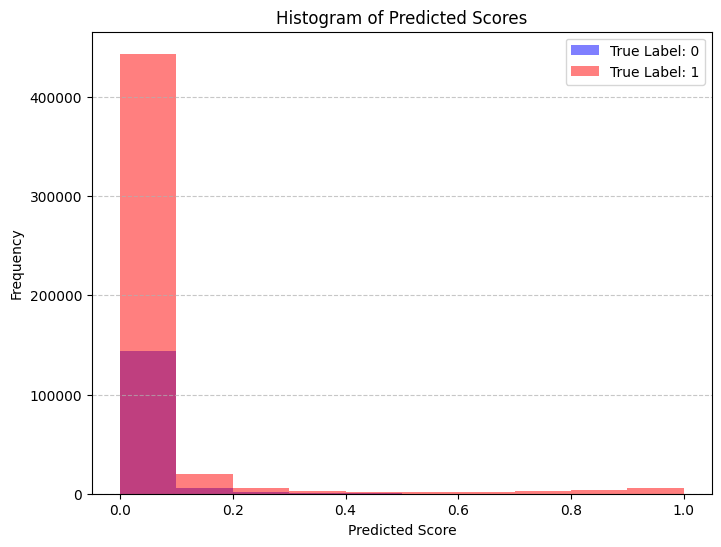

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv("test_predictions_pharos_full.csv")

# Extract true labels and predicted scores
true_labels = df["True_Label"]
predicted_scores = df["Predicted_Score"]

# Create histogram
plt.figure(figsize=(8, 6))
plt.hist(predicted_scores[true_labels == 0], bins=10, alpha=0.5, label="True Label: 0", color="blue")
plt.hist(predicted_scores[true_labels == 1], bins=10, alpha=0.5, label="True Label: 1", color="red")

# Formatting
plt.xlabel("Predicted Score")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Scores")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


### now want to see how many of these are like cold start 

In [3]:
def compute_overlap(df1, df2, column):
    return len(set(df1[column]).intersection(set(df2[column])))

def compute_pair_overlap(df1, df2, drug_col, target_col):
    pairs1 = set(zip(df1[drug_col], df1[target_col]))
    pairs2 = set(zip(df2[drug_col], df2[target_col]))
    return len(pairs1.intersection(pairs2))


davis = pd.read_csv('dataset/DAVIS/train.csv')
pharos_full = pd.read_csv('dataset/pharos_full/FullPharos.csv')
# Calculate overlaps in proteins and drugs between datasets
overlap_proteins = compute_overlap(davis, pharos_full, 'Target Sequence')
overlap_drugs = compute_overlap(davis, pharos_full, 'SMILES')

# Calculate overlaps in drug-target pairs
overlap_pairs = compute_pair_overlap(davis, pharos_full, 'SMILES', 'Target Sequence')

# Print overlaps
print(f"Protein Overlap (Train vs Val): {overlap_proteins}")
print(f"Drug Overlap (Train vs Val): {overlap_drugs}")
print(f"Drug-Target Pair Overlap: {overlap_pairs}")

Protein Overlap (Train vs Val): 317
Drug Overlap (Train vs Val): 0
Drug-Target Pair Overlap: 0
